<a href="https://colab.research.google.com/github/revysatyagunawan/Tugas_PCD_RevySatyaGunawan_24_538296_PA_22835/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 01 - Pengolahan Citra Digital
### Nama: Revy Satya Gunawan
### NIM: 24/538296/PA/22835

---

Pada tugas ini, kita akan melakukan down sampling dan up sampling.

---

---
**1. Import Library**

Kita mengimpor 3 library: cv2 untuk pengaplikasian Computer Vision, numpy untuk perhitungan matematika, dan cv2_imshow untuk penampilan citra.

---


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

---
**2. Muat dan Siapkan Gambar**

Kita gunakan wget untuk mengunduh file. Di sini sebagai contoh kita gunakan citra UGM pada masa lampau.

---



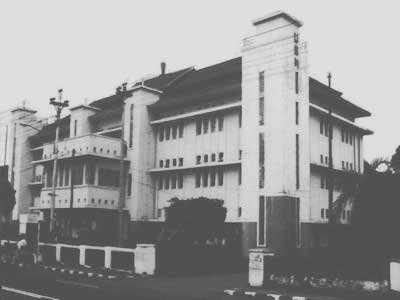

In [ ]:
!wget -q "https://lib.ugm.ac.id/wp-content/uploads/sites/44/2021/07/perpustakaan_unit_2_sekip.jpg" -O ugm.png
citra_asli = 'ugm.png'
citra = cv2.imread(citra_asli, cv2.IMREAD_GRAYSCALE)

cv2_imshow(citra)

---
**3. Lakukan Down Sampling**

Kita akan mengimplementasikan fungsi down sampling untuk tiga metode: Max Pooling, Average Pooling, dan Median Pooling. Kita gunakan numpy zeros untuk membuat matriks citra downsampled yang awalnya (sebelum dihitung) berisi 0 di setiap piksel.

---



Hasil Max Pooling:


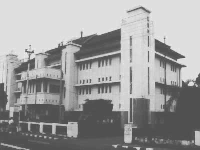

Hasil Average Pooling:


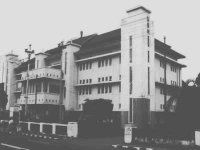

Hasil Median Pooling:


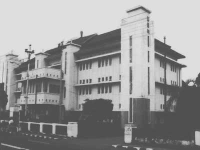

In [ ]:
def downsample(citra, method):
    t, l = citra.shape
    t_blok, l_blok = 2, 2
    t_baru, l_baru = t // t_blok, l // l_blok
    citra_downsampled = np.zeros((t_baru, l_baru), dtype=citra.dtype)

    for i in range(t_baru):
        for j in range(l_baru):
            blok = citra[i*t_blok:(i+1)*t_blok, j*l_blok:(j+1)*l_blok]
            if method == 'max':
                citra_downsampled[i, j] = np.max(blok)
            elif method == 'average':
                citra_downsampled[i, j] = np.mean(blok)
            elif method == 'median':
                citra_downsampled[i, j] = np.median(blok)
    return citra_downsampled

hasil_ds_max = downsample(citra, 'max')
hasil_ds_average = downsample(citra, 'average')
hasil_ds_median = downsample(citra, 'median')

print("Hasil Max Pooling:")
cv2_imshow(hasil_ds_max)
print("Hasil Average Pooling:")
cv2_imshow(hasil_ds_average)
print("Hasil Median Pooling:")
cv2_imshow(hasil_ds_median)

---
**Langkah 4: Analisis Hasil Down Sampling**
Jika kita lihat dari jauh, mungkin perbedaannya tidak begitu signifikan. Namun, jika kita zoom in ketiga gambar tersebut, kita bisa melihat bahwa hasil average dan median pooling hampir sama, sedangkan hasil max pooling kehilangan beberapa detail asli: bagian yang seharusnya berwarna gelap memudar dan tercampur menjadi lebih terang . Perbedaan ini akan lebih terasa jika kita memerhatikan bagian yang cukup detail/kecil.


---



---
**5. Lakukan Up Sampling**

Kita akan melakukan up sampling untuk citra yang asli. Tinggi dan Lebar citra yang baru adalah dua kalinya. Kita akan menggunakan tiga metode interpolasi yang sudah disediakan oleh OpenCV: Nearest Neighbor, Bilinear, dan Bicubic.

---



Hasil Nearest Neighbor:


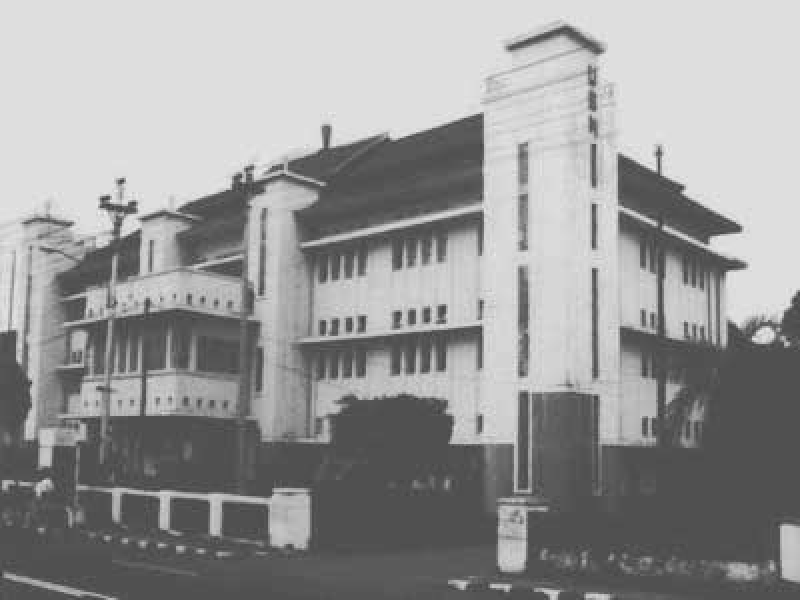

Hasil Bilinear:


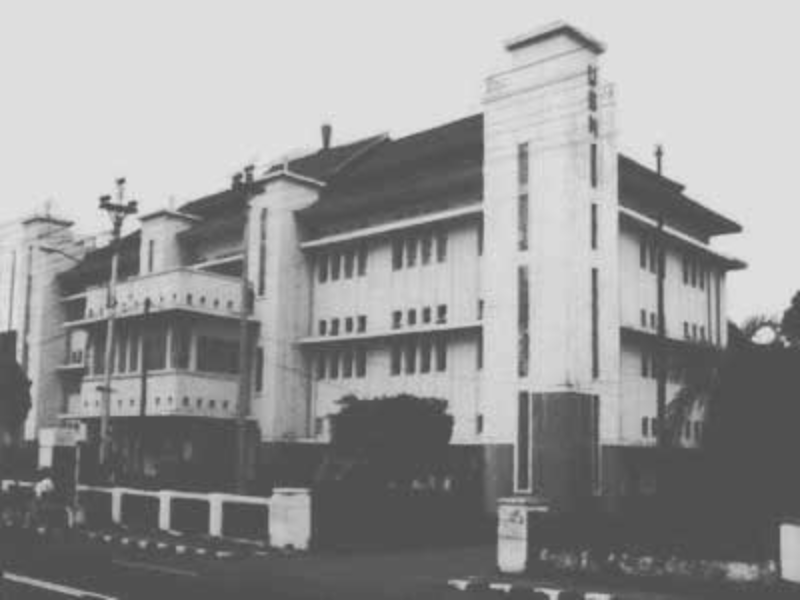

Hasil Bicubic:


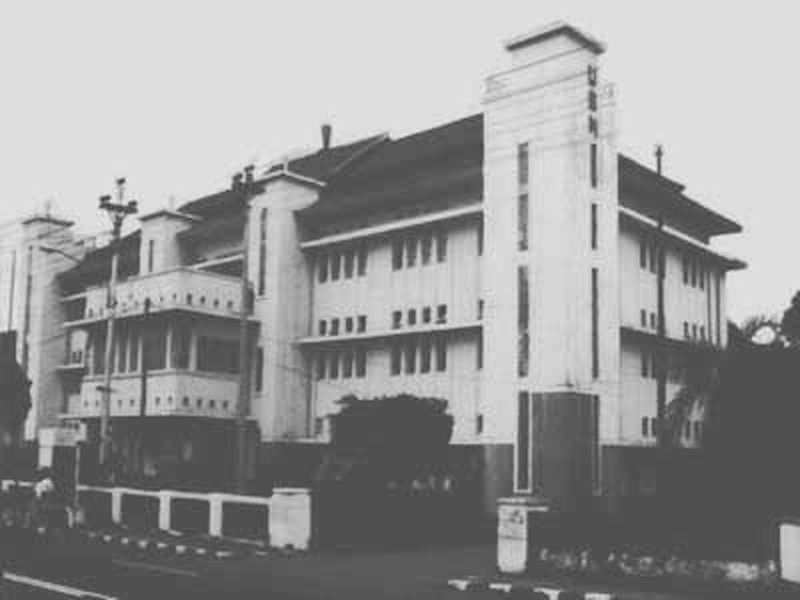

In [ ]:
uk_up_sampling = (citra.shape[1] * 2, citra.shape[0] * 2)

hasil_us_nn = cv2.resize(citra, uk_up_sampling, interpolation=cv2.INTER_NEAREST)
hasil_us_bl = cv2.resize(citra, uk_up_sampling, interpolation=cv2.INTER_LINEAR)
hasil_us_bc = cv2.resize(citra, uk_up_sampling, interpolation=cv2.INTER_CUBIC)

print("Hasil Nearest Neighbor:")
cv2_imshow(hasil_us_nn)
print("Hasil Bilinear:")
cv2_imshow(hasil_us_bl)
print("Hasil Bicubic:")
cv2_imshow(hasil_us_bc)


---
**6. Analisis Hasil Up Sampling**

Untuk ketiga hasil up sampling, perbedaannya tidak begitu terasa. Namun, kita bisa melakukan zoom in atau juga mengecek bagian yang cukup detail/kecil, seperti kabel tiang listrik untuk membandingkan ketiganya. Jika diperhatikan, interpolasi bicubic memberikan kualitas yang terbaik.

---

